<div align='center'>
    <h1>Jurnal Praktikum Dasar Kecerdasan Artifisial</h1>
    <h2>Arka Dwi Indrastata 1203230017 (IF-03-02)
    <h3>Modul 5: Implementasi Breadth First Search dan Depth First Search</h3>
</div>

### Tujuan Praktikum
- Mahasiswa memahami dan mampu mengimplementasikan algoritma *Breadth-First Search* pada Python dengan menggunakan *library* NetworkX.
- Mahasiswa memahami dan mampu mengimplementasikan algoritma *Depth-First Search* pada Python dengan menggunakan *library* NetworkX.

**Jangan lupa untuk selalu import *library* NetworkX ketika memulai sesi baru (run time) atau kode Python yang memerlukan penggunaan library NetworkX**

### Import *Library* NetworkX dan Matplotlib

*Library* Matplotlib digunakan untuk membantu menampilkan visualisasi graf pada terminal.

In [39]:
import networkx as nx # Library untuk membuat graf
import matplotlib.pyplot as plt # Library untuk plot grafik

### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [40]:
# Posisi node
pos = {
    'PK': (0, 0),
    'Terminal': (-1, 1),
    'Stasiun': (1, 0), 
    'Pasar': (-1, -1),
    'RS': (2, 0),
}

In [41]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
  # Membuat pos jika pos tidak diberikan
  if pos is None:
      pos = nx.spring_layout(G)
  
  # Fungsi untuk menggambar node
  nx.draw(
      G,                  # Graf NetworkX
      pos,                # Posisi node
      with_labels=True,   # Menampilkan nama node 
      node_color='red',   # Warna node
      node_size=3500,     # Ukuran node
      font_color="white", # Warna font label node
      font_weight="bold", # Ketebalan font label node
      width=5             # Ketebalan garis edge
  )

  # Mengambil label edge jika ada weight
  edge_labels = nx.get_edge_attributes(G, 'weight')  
  # Fungsi untuk menggambar node
  nx.draw_networkx_edge_labels(
      G,
      pos,
      edge_labels=edge_labels, # Data weight
      font_color='blue',       # Warna font label edge
      font_weight="bold",      # Berat font label edge
      font_size=16,            # Ukuran font label edge
  )

  plt.margins(0.2)  # Memberikan margin pada plot
  plt.title(title)  # Menampilkan judul graf jika diberikan
  plt.show()        # Menampilkan graf menggunakan matplotlib


### 1. Implementasi BFS pada *Weighted Undirected Graph* (Bobot Nilai: `50`)

Dora adalah seorang penjelajah yang suka berpetualang di kota-kota baru. Kali ini, Dora mengunjungi sebuah kota bernama "BojongCity". Kota ini memiliki beberapa titik penting, seperti pusat kota, terminal bus, stasiun kereta, pasar, dan rumah sakit. Semua titik ini dihubungkan oleh jalan dengan jarak tertentu yang diukur dalam kilometer. Dora ingin mengetahui rute terpendek yang harus ia tempuh dari satu titik ke titik lainnya menggunakan jalan yang ada.

Bantu Dora untuk membuat program Python yang dapat membantu Dora dengan membuat graf dengan langkah-langkah berikut:

**a.** Inisialisasi graf bernama `kota` menggunakan **graf tidak berarah** untuk menunjukkan arah perjalanan.

In [42]:
# Inisialisasi graf tidak berarah
kota = nx.Graph()

**b.** Tambahkan node untuk merepresentasikan setiap lokasi penting di kota BojongCity. Berikut ini adalah daftar node yang perlu ditambahkan ke dalam graf:
- `PK`: Mewakili **Pusat Kota**.
- `Terminal`: Mewakili **Terminal Bus**.
- `Stasiun`: Mewakili **Stasiun Kereta**.
- `Pasar`: Mewakili **Pasar**.
- `RS`: Mewakili **Rumah Sakit**.

Pastikan semua node tersebut ditambahkan ke dalam graf sehingga setiap lokasi di kota BojongCity dapat direpresentasikan dengan baik dan nantinya dapat dihubungkan oleh edge untuk menunjukkan rute di antara lokasi-lokasi tersebut.

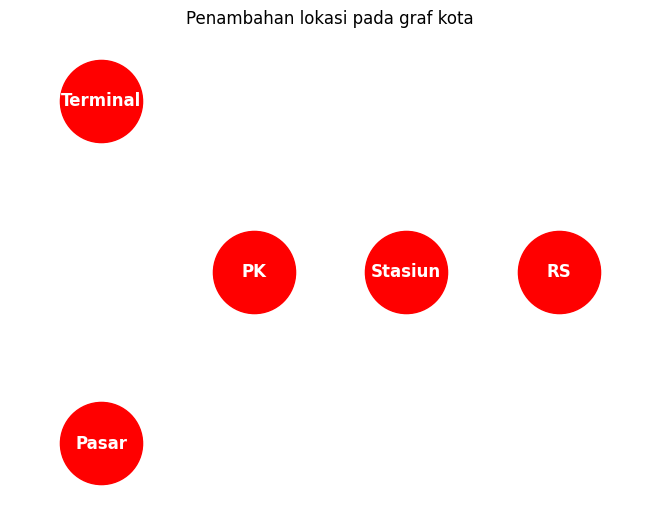

In [43]:
#Tambahkan node untuk merepresentasikan setiap lokasi penting di kota BojongCity
nodes = ['PK', 'Terminal', 'Stasiun', 'Pasar', 'RS']

# Tambahkan node dari list variabel `nodes` pada graf kota
kota.add_nodes_from(nodes)

# Tampilkan graf kota setelah penambahan node
show_graph(kota, pos=pos, title="Penambahan lokasi pada graf kota")

Contoh *output*:

![Contoh output penambahan lokasi](./asset/1_tambahlokasi_kota.png)

**c.** Pada graf kota, setiap edge mewakili hubungan antara dua lokasi, dan masing-masing hubungan memiliki jarak tempuh tertentu yang direpresentasikan sebagai `weight` pada graf. Berikut ini adalah daftar jarak antar lokasi yang ada di kota tersebut:

- `Pusat Kota (PK)` ke `Terminal` memiliki jarak `4km`.
- `Pusat Kota (PK)` ke `Stasiun` memiliki jarak `3km`.
- `Stasiun` ke `Rumah Sakit (RS)` memiliki jarak `5km`.
- `Terminal` ke `Pasar` memiliki jarak `3km`.
- `Pasar` ke `Stasiun` memiliki jarak `1km`.
- `Terminal` ke `Stasiun` memiliki jarak `6km`.

Tugas Anda adalah menambahkan edge ke dalam graf untuk setiap hubungan lokasi yang terdaftar di atas. Pastikan setiap edge mencakup informasi jarak tempuh (weight) sebagai atribut tambahan.

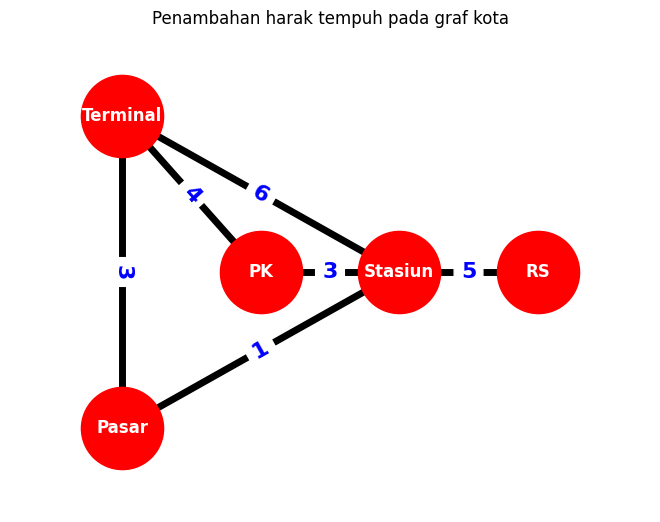

In [45]:
# Daftar hubungan (edge) antar lokasi di BojongCity beserta jarak tempuh (weight) masing-masing
edges = [
    ('PK', 'Terminal', 4),
    ('PK', 'Stasiun', 3),
    ('Stasiun', 'RS', 5),
    ('Terminal', 'Pasar', 3),
    ('Pasar', 'Stasiun', 1),
    ('Terminal', 'Stasiun', 6)
]

# Tambahkan edge beserta weightnya ke dalam graf kota
kota.add_weighted_edges_from(edges)

# Tampilkan graf kota setelah penambahan edge
show_graph(kota, pos=pos, title="Penambahan harak tempuh pada graf kota")

Contoh *output*:

![Contoh output penambahan lokasi](./asset/2_tambahjarak_kota.png)

**d.** Pada potongan kode dibawah, buat program yang menampilkan informasi berikut:

- **Daftar semua lokasi yang terdapat di BojongCity**: Program menampilkan output daftar lengkap lokasi pada graf.
- **Jarak antar lokasi**: Program ini menampilkan output setiap hubungan antara dua lokasi dan mencantumkan jarak tempuh dalam satuan kilometer.

In [46]:
print("Elemen pada Graf kota")
# Menampilkan daftar semua lokasi (node) yang terdapat pada graf kota
print("Daftar lokasi yang terdapat pada kota:", list(kota.nodes))

print()  # Menambahkan baris kosong (biarkan kosong)

# Loop melalui setiap edge pada graf untuk menampilkan informasi jarak (weight) antar lokasi
# Setiap edge memiliki format (asal, tujuan, data), di mana `data` menyimpan atribut dari edge tersebut.
for asal, tujuan, data in kota.edges(data=True):
    print(asal, "ke", tujuan, "memiliki jarak", data['weight'], "km")


Elemen pada Graf kota
Daftar lokasi yang terdapat pada kota: ['PK', 'Terminal', 'Stasiun', 'Pasar', 'RS']

PK ke Terminal memiliki jarak 4 km
PK ke Stasiun memiliki jarak 3 km
Terminal ke Pasar memiliki jarak 3 km
Terminal ke Stasiun memiliki jarak 6 km
Stasiun ke RS memiliki jarak 5 km
Stasiun ke Pasar memiliki jarak 1 km


Contoh *output*:

```
Elemen pada Graf kota
Daftar lokasi yang terdapat pada kota ['PK', 'Terminal', 'Stasiun', 'Pasar', 'RS']

PK ke Terminal memiliki jarak 4 km
PK ke Stasiun memiliki jarak 3 km
Terminal ke Pasar memiliki jarak 3 km
Terminal ke Stasiun memiliki jarak 6 km
Stasiun ke RS memiliki jarak 5 km
Stasiun ke Pasar memiliki jarak 1 km
```

**e.** Dora ingin mengetahui urutan perjalanan di kota BojongCity menggunakan algoritma `Breadth-First Search (BFS)`, dimulai dari `Pusat Kota (PK)` sebagai titik awal. Tugas anda adalah menampilkan daftar **edge** yang dilalui oleh algoritma BFS saat menjelajahi semua lokasi di kota, mulai dari node `PK`.

In [47]:
print(list(nx.bfs_edges(kota, source='PK')))

[('PK', 'Terminal'), ('PK', 'Stasiun'), ('Terminal', 'Pasar'), ('Stasiun', 'RS')]


Contoh *output*:

```
[('PK', 'Terminal'), ('PK', 'Stasiun'), ('Terminal', 'Pasar'), ('Stasiun', 'RS')]
```

**f.** Buatlah sebuah fungsi `bfs_search(bfs_tree, start, end)` yang dapat membangun jalur dari node awal (`start`) dan node tujuan (`end`) berdasarkan struktur `bfs_tree` yang diberikan.

Fungsi `bfs_search()` harus melakukan langkah-langkah berikut :
- Mulai dari `end` dan telusuri mundur ke `start` menggunakan informasi `parent-child` pada `bfs_tree`.
- Simpan jalur yang ditemukan pada list `path`
- Jika node `start` berhasil ditemukan, kembalikan `path` yang menunjukkan urutan dari node `start` ke `end`.

In [48]:
def bfs_search(bfs_tree, start, end):
    # Inisialisasi list kosong untuk menampung jalur yang ditempuh
    path = []

    # Mulai dari node tujuan
    current_node = end

    # Telusuri jalur mundur dari end ke start
    while current_node != start:
        path.append(current_node)  # Tambahkan node ke dalam jalur
        current_node = bfs_tree[current_node]  # Ambil parent dari node tersebut

    # Tambahkan node awal setelah mencapai start
    path.append(start)

    # Balik urutan agar dari start ke end
    path.reverse()

    return path


**g.** Buatlah sebuah fungsi `calculate_total_distance(graph, path)` yang akan menghitung total jarak tempuh dari jalur `path` pada graf `graph`. Berikut adalah langkah-langkah yang harus dilakukan dalam fungsi `calculate_total_distance()`:
- Inisialisasi variabel `total_distance` sebagai 0.
- Lakukan loop untuk mengiterasi pada setiap node pada `path` (kecuali node terakhir).
- Ambil jarak tempuh dari edge yang menghubungkan node saat ini (`node_awal`) ke node berikutnya (`node_tujuan`).
- Tambahkan weight tersebut ke dalam `total_distance`.

In [49]:
# Fungsi untuk menghitung total jarak dari node awal ke tujuan
def calculate_total_distance(graph, path):
    total_distance = 0  # Inisialisasi jarak total

    # Loop melalui setiap node dalam path dan jumlahkan weight dari setiap edge yang dilalui
    for i in range(len(path) - 1):
        node_awal = path[i]         # Node awal
        node_tujuan = path[i + 1]   # Node tujuan

        # Tambahkan weight dari edge yang menghubungkan node_awal ke node_tujuan
        total_distance += graph[node_awal][node_tujuan]['weight']

    return total_distance


**h.** Buatlah sebuah program yang meminta input dari pengguna untuk menentukan:
- **Node awal** (`start_node`): Titik awal perjalanan Dora di kota BojongCity.
- **Node tujuan** (`end_node`): Titik tujuan yang ingin dicapai oleh Dora.

Gunakan algoritma BFS untuk menelusuri graf yang mewakili kota, dimulai dari `start_node`. Simpan hasil BFS dalma bentuk pasang node (`bfs_edges`) yang menunjukkan jalur pencarian dari node awal ke node-node yang terhubung.

Tampilkan hasil pencarian BFS (`bfs_edge`) yang menunjukkan semua node yang dikunjungi dan hubungan antar node yang ditemukan selama pencarian BFS dimulai dari `start_node`.

In [50]:
# Minta input dari pengguna untuk titik awal dan titik tujuan
start_node = input("Masukkan node awal: ")
end_node = input("Masukkan node tujuan: ")

# Temukan rute terpendek menggunakan algoritma BFS
# Menggunakan bfs_edges untuk mendapatkan jalur BFS dari node awal
bfs_edges = list(nx.bfs_edges(kota, source=start_node))

print(f"{start_node} disimpan sebagai lokasi awal")
print(f"{end_node} disimpan sebagai lokasi tujuan")
print("Hasil pencarian BFS dari lokasi awal:", bfs_edges)


Pasar disimpan sebagai lokasi awal
PK disimpan sebagai lokasi tujuan
Hasil pencarian BFS dari lokasi awal: [('Pasar', 'Terminal'), ('Pasar', 'Stasiun'), ('Terminal', 'PK'), ('Stasiun', 'RS')]


Contoh *output*:

|input|output|
|-----|------|
|Masukkan titik awal: `Pasar`<br>Masukkan titk tujuan: `PK`|Pasar disimpan sebagai lokasi awal<br>PK disimpan sebagai lokasi tujuan<br>Hasil pencarian BFS dari lokasi awal: [('Pasar', 'Terminal'), ('Pasar', 'Stasiun'), ('Terminal', 'PK'), ('Stasiun', 'RS')]|
|Masukkan titik awal: `Terminal`<br>Masukkan titk tujuan: `Stasiun`|Terminal disimpan sebagai lokasi awal<br>Stasiun disimpan sebagai lokasi tujuan<br>Hasil pencarian BFS dari lokasi awal: [('Terminal', 'PK'), ('Terminal', 'Pasar'), ('Terminal', 'Stasiun'), ('Stasiun', 'RS')]|

**i.** Buatlah deskripsi dictionary bernama `bfs_tree` yang menyimpan hubungan parent-child dari hasil BFS, Setiap key dalam dictionary `bfs_tree` mewakili node child (tujuan), dan value-nya mewakili node parent (asal).

Gunakan pasangan node (`u`, `v`) yang diberikan oleh `bfs_edges` untuk membangun `bfs_tree`. Setiap pasangan(`u`, `v`) berarti :
- `u` adalah parent dari `v`.
- `v` adalah child dari `u`.

In [51]:
# Buat dictionary untuk melacak jalur dari titik awal ke semua node yang dikunjungi
bfs_tree = {}
for u, v in bfs_edges:
    bfs_tree[v] = u

**j.** Sekarang, Dora ingin mengetahui rute terpendek dari lokasi awal (`start_node`) ke lokasi tujuan (`end_node`) berdasarkan hasil penelusuran BFS tersebut. Selain itu, Dora juga ingin mengetahui tempat mana saja yang harus ia kunjungi. Selain itu, Dora juga ingin mengetahui total jarak tempuh dari jalur yang ditemukan agar ia dapat mempersiapkan dirinya.

Buatlah program yang dapat menemukan rute terpendek dari node awal ke node tujuan menggunakan hasil penelurusan `bfs_tree` yang sudah dibuat dan program untuk menghitung total jarak tembuh dari jalu tersebut berdasarkan `weight` dari setiap edge yang dilalui dengan langkah-langkah berikut:
- Gunakan fungsi `bfs_search()` untuk menemukan rute dari `start_node` ke `end_node`.
- Jika terdapat jalur dari `start_node` ke `end_node`, hitung total jarak tempuh dari jalur tersebut menggunakan fungsi `calculate_total_distance()`.
- Tampilkan rute terpendek dan total jarak tempuh yang ditemukan.

In [52]:
# Temukan jalur dari titik awal ke titik tujuan
shortest_path = bfs_search(bfs_tree, start_node, end_node)

# Jika jalur ditemukan, hitung total jarak berdasarkan rute yang ditemukan
if shortest_path:
    total_distance = calculate_total_distance(kota, shortest_path)
    print(f"Rute terpendek dari {start_node} ke {end_node}: {shortest_path}")
    print(f"Total jarak tempuh: {total_distance} km")
else:
    print(f"Tidak ditemukan rute dari {start_node} ke {end_node}.")


Rute terpendek dari Pasar ke PK: ['Pasar', 'Terminal', 'PK']
Total jarak tempuh: 7 km


Contoh *output*:

Jika sebelumnya memberikan input `Terminal` sebagai titik awal dan `Stasiun` sebagai titik tujuan
```
Rute terpendek dari Terminal ke Stasiun: ['Terminal', 'Stasiun']
Total jarak tempuh: 6 km
```

Jika sebelumnya memberikan input `Pasar` sebagai titik awal dan `PK` sebagai titik tujuan
```
Rute terpendek dari Pasar ke PK: ['Pasar', 'Terminal', 'PK']
Total jarak tempuh: 7 km
```


### 2. Implementasi DFS pada *Tree* (Bobot Nilai: `50`)

Budi adalah seorang mahasiswa yang sering bekerja dengan banyak folder dan file di laptopnya. Sebagai seorang mahasiswa yang aktif dalam berbagai kegiatan akademis dan organisasi, folder di laptop Budi serngkali menjadi sangat rumit dan bercabang-cabang, dengan banyak sub-folder dan file yang tersebar di berbagai tempat.

Anda diminta untuk membuat sebuah program yang dapat membantu Budi melakukan penelusuran direktori menggunakan algoritma DFS. Program ini diharapkan dapat mempermudah Budi dalam menemukan file yang ia cari.

**Jangan lupa untuk selalu import *library* NetworkX ketika memulai sesi baru (run time) atau kode Python yang memerlukan penggunaan library NetworkX**

### Import *Library* NetworkX dan Matplotlib

*Library* Matplotlib digunakan untuk membantu menampilkan visualisasi graf pada terminal.

In [53]:
import networkx as nx # Library untuk membuat graf
import matplotlib.pyplot as plt # Library untuk plot grafik

### Fungsi pendukung untuk mencetak graf 

#### **!! Tidak usah dimodifikasi !!**

In [54]:
pos = {
    "Root": (0, 0),
    "Documents": (-1, -1),
    "Images": (1, -1),
    "Videos": (2, -1),
    "File1.txt": (-1, -2),
    "File4.docx": (-1.5, -2),
    "File2.jpg": (1, -2),
    "File3.mp4": (2, -2)
}

In [55]:
# Fungsi pendukung untuk mencetak graf
def show_graph(G, pos=None, title='') :
  # Membuat pos jika pos tidak diberikan
  if pos is None:
      pos = nx.spring_layout(G)
  
  # Fungsi untuk menggambar node
  nx.draw(
      G,                  # Graf NetworkX
      pos,                # Posisi node
      with_labels=True,   # Menampilkan nama node 
      node_color='red',   # Warna node
      node_size=2000,     # Ukuran node
      font_color="white", # Warna font label node
      font_weight="bold",
      font_size=7,
      width=5             # Ketebalan garis edge
  )

  # Mengambil label edge jika ada weight
  edge_labels = nx.get_edge_attributes(G, 'weight')  
  # Fungsi untuk menggambar node
  nx.draw_networkx_edge_labels(
      G,
      pos,
      edge_labels=edge_labels, # Data weight
      font_color='blue',       # Warna font label edge
      font_weight="bold",      # Berat font label edge
      font_size=16,            # Ukuran font label edge
  )

  plt.margins(0.2)  # Memberikan margin pada plot
  plt.title(title)  # Menampilkan judul graf jika diberikan
  plt.show()        # Menampilkan graf menggunakan matplotlib

**a.** Inisialisasi graf bernama "data_budi" menggunakan **graf berarah** untuk menunjukkan arah perjalanan.

In [57]:
# Inisialisasi graf berarah
data_budi = nx.DiGraph()

**b.** Tambahkan node ke dalam graf yang merepresentasikan folder dan file. Folder tersebut terdiri dari `Root`, `Documents`, `Images`, `Videos`, `File1.txt`, `File2.jpg`, `File3.mp4`, `File4.docx`.

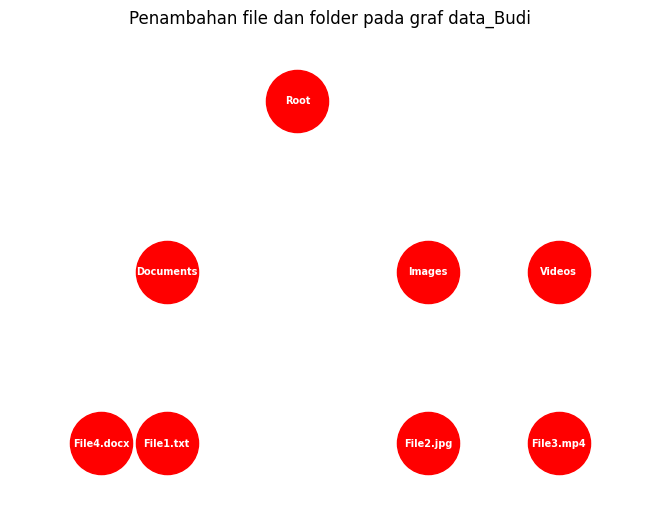

In [58]:
# List daftar nama file dan folder yang terdapat pada laptop Budi
nodes = pos

# Tambahkan node dari list variabel `nodes` pada graf data_budi
data_budi.add_nodes_from(nodes)

# Tampilkan graf data_budi setelah penambahan node
show_graph(data_budi, pos=pos, title="Penambahan file dan folder pada graf data_Budi")

Contoh *output*:

![Contoh output penambahan lokasi](./asset/3_tambahfilefolder_databudi.png)

**c.** Berikut adalah daftar isi dari setiap folder. Hubungkan tree berdasarkan isi dari setiap folder pada laptop Budi.
- `Root` berisi `Documents`, `Images`, dan `Videos`.
- `Documents` berisi `File4.docx` dan `File1.txt`.
- `Images` berisi `File2.jpg`.
- `Videos` berisi `File3.mp4`.

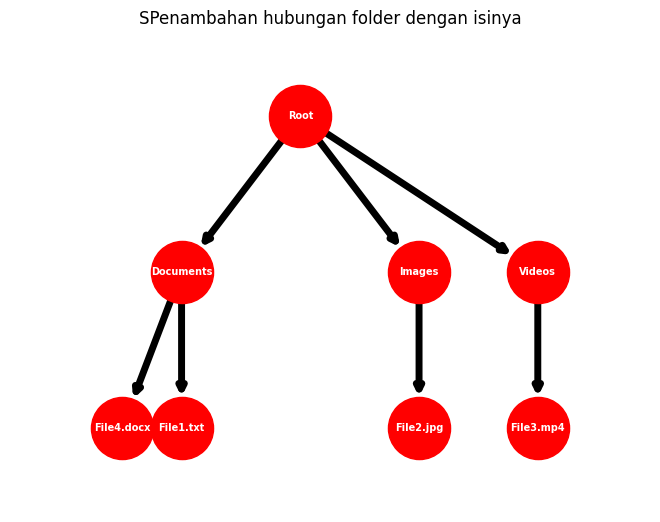

In [29]:
# Daftar isi dari setiap folder yang direpresentasikan dengan edge.
edges = [
    ("Root", "Documents"),
    ("Root", "Images"),
    ("Root", "Videos"),
    ("Documents", "File4.docx"),
    ("Documents", "File1.txt"),
    ("Images", "File2.jpg"),
    ("Videos", "File3.mp4")
]

# Tambahkan edge ke dalam graf data_budi
data_budi.add_edges_from(edges)

# Tampilkan graf data_budi setelah penambahan edge
show_graph(data_budi, pos=pos, title="SPenambahan hubungan folder dengan isinya")

Contoh *output*:

![Contoh output penambahan lokasi](./asset/4_tambahedgefolder_databudi.png)

**d.** Buat sebuah program yang memanfaatkan tree `data_budi` untuk mencetak setiap folder beserta daftar isi dari folder tersebut.

In [30]:
print("Daftar Folder beserta isinya di laptop Budi")

# Iterasi untuk setiap node (folder/file) yang ada di graf `data_budi`
for node in data_budi.nodes() :
    # Ambil semua node yang terhubung dengan node saat ini (anak-anak dari folder)
    children = list(data_budi.neighbors(node))

    # Jika folder memiliki isi (memiliki anak), tampilkan daftarnya
    if children:
        # Tampilkan folder beserta daftar isinya
        print(f"- {node} berisi: {children}")

Daftar Folder beserta isinya di laptop Budi
- Root berisi: ['Documents', 'Images', 'Videos']
- Documents berisi: ['File4.docx', 'File1.txt']
- Images berisi: ['File2.jpg']
- Videos berisi: ['File3.mp4']


Contoh *output* :

```
Daftar Folder beserta isinya di laptop Budi
- Root berisi: ['Documents', 'Images', 'Videos']
- Documents berisi: ['File1.txt', 'File4.docx']
- Images berisi: ['File2.jpg']
- Videos berisi: ['File3.mp4']
```

**e.** Tampilkan urutan **folder dan file** yang dilalui dengan node asal `Root` menggunakan algoritma DFS yang disediakan dari NetworkX.

In [31]:
# Menampilkan urutan edge yang dilalui dari node Root menggunakan DFS
dfs_edges = list(nx.dfs_edges(data_budi, source='Root'))

# Menampilkan urutan edge yang dilalui
print(dfs_edges)

[('Root', 'Documents'), ('Documents', 'File4.docx'), ('Documents', 'File1.txt'), ('Root', 'Images'), ('Images', 'File2.jpg'), ('Root', 'Videos'), ('Videos', 'File3.mp4')]


Contoh *output* :
```
[('Root', 'Documents'), ('Documents', 'File1.txt'), ('Documents', 'File4.docx'), ('Root', 'Images'), ('Images', 'File2.jpg'), ('Root', 'Videos'), ('Videos', 'File3.mp4')]
```

**f.** Buatlah sebuah fungsi `dfs_search(graph, start, goal)` yang akan mencari dan menampilkan jalur dari node awal (`start`) ke node tujuan (`goal`) menggunakan algoritma DFS dengan deskripsi berikut:
- Gunakan stack untuk menyimpan node yang akan ditelusuri.
- Setiap elemen pada stack menyimpan `(current_node, path)` yang terdiri dari node saat ini dan jalur yang ditempuh hingga node tersebut.
- Lakukan iterasi DFS dengan memproses node terakhir dari stack.
- Jika `current_node` sama dengan `goal`, kembalikan jalur (`path`) yang telah ditemukan.
- Jika node saat ini memiliki tetangga yang belum dikunjungi, tambahkan tetangga tersebut ke stack.

In [32]:
def dfs_search(graph, start, goal):
    # Inisialisasi stack dengan tuple (node saat ini, jalur yang ditempuh)
    stack = [(start, [start])]
    
    # Iterasi selama stack tidak kosong
    while stack:
        # Ambil node terakhir dari stack bersama jalurnya
        current_node, path = stack.pop()
        
        # Jika node saat ini adalah node tujuan, kembalikan jalur yang ditemukan
        if current_node == goal:
            return path
        
        # Tambahkan semua node tetangga yang belum dikunjungi ke stack
        for neighbor in graph.neighbors(current_node):
            # Pastikan tetangga belum ada di path untuk menghindari loop
            if neighbor not in path: 
                # Tambahkan tetangga ke stack dengan jalur baru
                stack.append((neighbor, path + [neighbor]))  

    # Jika tidak ada jalur yang ditemukan, kembalikan None
    return None

**g.** Buatlah sebuah program yang dapat melakukan langkah-langkah berikut:
- Meminta input pengguna sebagai titik awal folder pada variabel `start_node`.
- Meminta input pengguna untuk file yang dicari pada variabel `end_node`.
- Gunakan fungsi `dfs_search()` untuk menemukan urutan folder yang harus dikunjungi.
- Jika terdapat jalur dari `start_node` ke `end_node`, tampilkan folder mana saja yang harus dikunjungi.

In [33]:
# Minta input dari pengguna untuk node awal dan node tujuan
start_node = input("Masukkan nama folder awal: ")
end_node = input("Masukkan nama file yang dicari: ")

# Temukan jalur dari titik awal ke titik tujuan menggunakan DFS
path = dfs_search(data_budi, start_node, end_node)

# Tampilkan hasil penelusuran
if path:
    print(f"Rute yang harus dilalui dari {start_node} ke {end_node}: {path}")
else:
    print(f"Tidak ada rute yang menghubungkan {start_node} ke {end_node}.")

Rute yang harus dilalui dari Root ke File2.jpg: ['Root', 'Images', 'File2.jpg']


Contoh *output*:

|input|output|
|-----|------|
|Masukkan folder/file awal: `Root`<br>Masukkan folder/file tujuan: `File2.jpg`|Rute yang harus dilalui dari Root ke File2.jpg: ['Root', 'Images', 'File2.jpg']|
|Masukkan folder/file awal: `Root`<br>Masukkan folder/file tujuan: `File4.docx`|Rute yang harus dilalui dari Root ke File4.docx: ['Root', 'Documents', 'File4.docx']|